In [1]:
import lightgbm as lgb
import matplotlib.pyplot
import pandas as pd

In [2]:
model_path = "../models/lgbm_optuna.txt"
data_path = "../data/processed/test.csv"

In [3]:
model = lgb.Booster(model_file=model_path)
df = pd.read_csv(data_path)

In [4]:
df

,Unnamed: 0,Country,StockCode,Year,Month,Day,Hour,min,sec,is_weekend,day_of_week,hour_sin,hour_cos,quarter,stockcode_freq,country_freq,target
0,363675,United Kingdom,0.416846,2010,9,30,8,59,0,0,3,8.660254e-01,-0.5,3,55,981330,1
1,363676,United Kingdom,0.174607,2010,9,30,8,59,0,0,3,8.660254e-01,-0.5,3,73,981330,0
2,363677,United Kingdom,0.189413,2010,9,30,8,59,0,0,3,8.660254e-01,-0.5,3,77,981330,0
3,363678,United Kingdom,0.428841,2010,9,30,8,59,0,0,3,8.660254e-01,-0.5,3,105,981330,1
4,363679,United Kingdom,0.399714,2010,9,30,8,59,0,0,3,8.660254e-01,-0.5,3,61,981330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703691,1067366,France,0.096489,2011,12,9,12,50,0,0,4,1.224647e-16,-1.0,4,96,14330,0
703692,1067367,France,0.175224,2011,12,9,12,50,0,0,4,1.224647e-16,-1.0,4,58,14330,0
703693,1067368,France,0.151418,2011,12,9,12,50,0,0,4,1.224647e-16,-1.0,4,23,14330,0
703694,1067369,France,0.235007,2011,12,9,12,50,0,0,4,1.224647e-16,-1.0,4,435,14330,0


In [5]:
df.drop(columns=["Unnamed: 0"] , inplace=True)

In [6]:
X = df.drop(columns= ["target"])
y = df["target"]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703696 entries, 0 to 703695
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country         703696 non-null  object 
 1   StockCode       703696 non-null  float64
 2   Year            703696 non-null  int64  
 3   Month           703696 non-null  int64  
 4   Day             703696 non-null  int64  
 5   Hour            703696 non-null  int64  
 6   min             703696 non-null  int64  
 7   sec             703696 non-null  int64  
 8   is_weekend      703696 non-null  int64  
 9   day_of_week     703696 non-null  int64  
 10  hour_sin        703696 non-null  float64
 11  hour_cos        703696 non-null  float64
 12  quarter         703696 non-null  int64  
 13  stockcode_freq  703696 non-null  int64  
 14  country_freq    703696 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 80.5+ MB


In [8]:
X.columns

Index(['Country', 'StockCode', 'Year', 'Month', 'Day', 'Hour', 'min', 'sec',
       'is_weekend', 'day_of_week', 'hour_sin', 'hour_cos', 'quarter',
       'stockcode_freq', 'country_freq'],
      dtype='object')

In [9]:
# Convert Country to categorical type (matching training)
X['Country'] = X['Country'].astype('category')


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703696 entries, 0 to 703695
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Country         703696 non-null  category
 1   StockCode       703696 non-null  float64 
 2   Year            703696 non-null  int64   
 3   Month           703696 non-null  int64   
 4   Day             703696 non-null  int64   
 5   Hour            703696 non-null  int64   
 6   min             703696 non-null  int64   
 7   sec             703696 non-null  int64   
 8   is_weekend      703696 non-null  int64   
 9   day_of_week     703696 non-null  int64   
 10  hour_sin        703696 non-null  float64 
 11  hour_cos        703696 non-null  float64 
 12  quarter         703696 non-null  int64   
 13  stockcode_freq  703696 non-null  int64   
 14  country_freq    703696 non-null  int64   
dtypes: category(1), float64(3), int64(11)
memory usage: 75.8 MB


In [11]:
predictions = model.predict(X)

In [12]:
predictions = (predictions >= 0.4).astype(int)

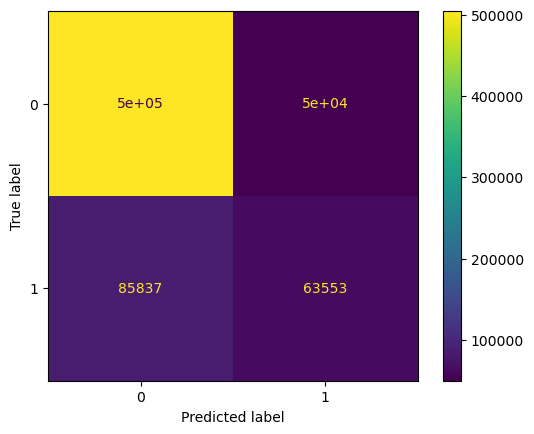

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Generate the matrix
# y_true are your actual labels, y_pred are your model's guesses
cm = confusion_matrix(y, predictions)

# 2. Visualize it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y , predictions)

0.8075674723175917

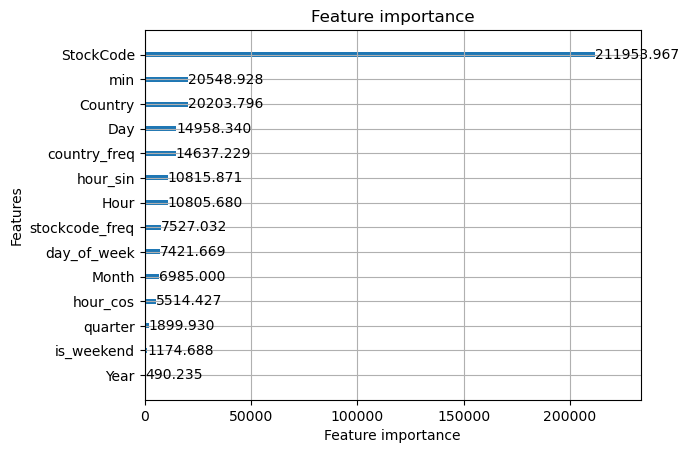

In [16]:
lgb.plot_importance(model, importance_type='gain', max_num_features=20)
plt.show()
